In [1]:
!pip install -q transformers[torch] transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
!pip install pymongo[srv]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.8 MB/s eta 0:00:00


In [3]:
!pip install bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.4 MB/s eta 0:00:00


In [4]:
!huggingface-cli login --token 

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
The token `ds-token` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `ds-token`


In [5]:
from datasets import Dataset
import pandas as pd
import pymongo


mongodb_uri = "..."
client = pymongo.MongoClient(mongodb_uri)
db = client["article"]
collection = db["processed_articles_5_sec"]

data = list(collection.find())
df = pd.DataFrame(data)
print("DataFrame head:")
print(df.head())


DataFrame head:
                        _id  \
0  67405de005c44c6524185334   
1  67405de005c44c6524185335   
2  67405de005c44c6524185336   
3  67405de005c44c6524185337   
4  67405de005c44c6524185338   

                                               Title  \
0  Determinants Associated with COVID-19 Vaccinat...   
1  Tech vs. Tradition: ChatGPT and Mindfulness in...   
2  The Discursive Configuration of the Therapeuti...   
3  The Moderating Role of the Five-Factor Model o...   
4  The Impact of Insecure Attachment on Emotional...   

                                                Link  \
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...   
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...   
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...   
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...   
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...   

                                            Abstract  \
0  Abstract COVID-19 vaccination is a critical pu...   
1  Abstract

In [6]:
import pandas as pd
import re

def remove_citations(text):
    return re.sub(r'\[.*?\]|\(.*?\)', '', text)

columns_to_clean = ['Abstract', 'Keywords', 'Section 1. Introduction', 'Section 2. Materials and Methods',
                    'Section 3. Results', 'Section 4. Discussion', 'Section 5. Conclusions']

for col in columns_to_clean:
    df[col] = df[col].apply(remove_citations)

df

,_id,Title,Link,Abstract,Keywords,Section 1. Introduction,Section 2. Materials and Methods,Section 3. Results,Section 4. Discussion,Section 5. Conclusions
0,67405de005c44c6524185334,Determinants Associated with COVID-19 Vaccinat...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,Abstract COVID-19 vaccination is a critical pu...,"Keywords:COVID-19, adolescent, vaccination, An...",The onset of COVID-19 in January 2020 heralded...,2.1. Data and SampleThis study utilized primar...,The outcomes presented inTable 1illustrate an ...,This study examines the determinants of COVID-...,This study identified key determinants of COVI...
1,67405de005c44c6524185335,Tech vs. Tradition: ChatGPT and Mindfulness in...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,Abstract To improve older adults’ mental healt...,"Keywords:artificial intelligence, ChatGPT, min...",Global aging and technological advancements ha...,2.1. Study DesignThe study used a controlled d...,The chat companion experiment enrolled 15 part...,"Overall, we discovered that individuals’ feeli...",The purpose of this study was to look at how m...
2,67405de005c44c6524185336,The Discursive Configuration of the Therapeuti...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,Abstract Therapeutic communities face high dro...,"Keywords:users’ perspective, discourse analysi...",Interventions related to substance abuse are c...,2.1. Theoretical BackgroundThis study adopts t...,The responses collected through the protocols ...,"As discussed above, for some participants, the...","Based on the texts collected, it was possible ..."
3,67405de005c44c6524185337,The Moderating Role of the Five-Factor Model o...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,Abstract When organizations or managers utiliz...,"Keywords:five-factor model, interaction, moder...","Work engagement , defined as “a positive, fulf...",2.1. ParticipantsThe survey was conducted onli...,Table 2depicts the Pearson’s product–moment co...,The purpose of this study was to examine the m...,This study confirmed four interactions between...
4,67405de005c44c6524185338,The Impact of Insecure Attachment on Emotional...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,Abstract Previous evidence has demonstrated a ...,"Keywords:attachment, emotional dependence, emo...","Bowlby , a pioneer in attachment theory, argue...",2.1. ParticipantsThe sample comprised 741 part...,"First, the descriptive statistics and the ANOV...",The present study aimed to elucidate if diffic...,The present study highlights the harmful conse...
...,...,...,...,...,...,...,...,...,...,...
942,67405e1905c44c65241856e2,The Role of Regular Eating and Self-Monitoring...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Abstract Background: Despite cognitive behavio...,"Keywords:bulimia nervosa, online treatment, se...",Therapist-led cognitive behavioural therapy c...,2.1. ParticipantsParticipants were recruited f...,3.1. Participant CharacteristicsThe mean age o...,The findings of this study provide preliminary...,The present study provides preliminary evidenc...
943,67405e1905c44c65241856e3,NADA Ear Acupuncture: An Adjunctive Therapy to...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Abstract The National Acupuncture Detoxificati...,Keywords:The National Acupuncture Detoxificati...,The National Acupuncture Association protocol ...,A prospective randomized controlled trial too...,Of the 100 patients enrolled 61 completed the ...,The main findings from this study support the ...,Bearing in mind the study limitations discusse...
944,67405e1905c44c65241856e4,Poverty-Related Adversity and Emotion Regulati...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Abstract The current study examines the additi...,"Keywords:poverty, attention bias, emotion regu...","Internalizing problems of anxiety, depressive ...",2.1. ParticipantsSix hundred and two children ...,3.1. Descriptive AnalysesPrior to testing for ...,Our results suggest that a small but significa...,The

In [8]:
data = df[["Abstract","Section 1. Introduction","Section 5. Conclusions"]].copy()


In [ ]:
data

,Abstract,Section 1. Introduction,Section 5. Conclusions
0,Abstract COVID-19 vaccination is a critical pu...,The onset of COVID-19 in January 2020 heralded...,This study identified key determinants of COVI...
1,Abstract To improve older adults’ mental healt...,Global aging and technological advancements ha...,The purpose of this study was to look at how m...
2,Abstract Therapeutic communities face high dro...,Interventions related to substance abuse are c...,"Based on the texts collected, it was possible ..."
3,Abstract When organizations or managers utiliz...,"Work engagement , defined as “a positive, fulf...",This study confirmed four interactions between...
4,Abstract Previous evidence has demonstrated a ...,"Bowlby , a pioneer in attachment theory, argue...",The present study highlights the harmful conse...
...,...,...,...
942,Abstract Background: Despite cognitive behavio...,Therapist-led cognitive behavioural therapy c...,The present study provides preliminary evidenc...
943,Abstract The National Acupuncture Detoxificati...,The National Acupuncture Association protocol ...,Bearing in mind the study limitations discusse...
944,Abstract The current study examines the additi...,"Internalizing problems of anxiety, depressive ...",The results of this study have several importa...
945,Abstract This study explored 17 dyads of acade...,"In 1943, child psychiatrist Leo Kanner was the...",This study has provided specific examples of h...


In [9]:
# Extract the first three sentences from the Introduction
def extract_first_three_sentences(text):
    sentences = text.split(". ")  # Split text into sentences
    return ". ".join(sentences[:3]) + ("." if len(sentences) >= 3 else "")

# Apply the function to extract and merge with the Conclusion
data["Merged_Section"] = data.apply(
    lambda row: f"{extract_first_three_sentences(row['Section 1. Introduction'])} {row['Section 5. Conclusions']}",
    axis=1
)

# Display the result
print(data[["Merged_Section"]])

                                        Merged_Section
0    The onset of COVID-19 in January 2020 heralded...
1    Global aging and technological advancements ha...
2    Interventions related to substance abuse are c...
3    Work engagement , defined as “a positive, fulf...
4    Bowlby , a pioneer in attachment theory, argue...
..                                                 ...
942  Therapist-led cognitive behavioural therapy  c...
943  The National Acupuncture Association protocol ...
944  Internalizing problems of anxiety, depressive ...
945  In 1943, child psychiatrist Leo Kanner was the...
946  In a dynamic and noisy world, it is best to at...

[947 rows x 1 columns]


In [ ]:
data

,Abstract,Section 1. Introduction,Section 5. Conclusions,Merged_Section
0,Abstract COVID-19 vaccination is a critical pu...,The onset of COVID-19 in January 2020 heralded...,This study identified key determinants of COVI...,The onset of COVID-19 in January 2020 heralded...
1,Abstract To improve older adults’ mental healt...,Global aging and technological advancements ha...,The purpose of this study was to look at how m...,Global aging and technological advancements ha...
2,Abstract Therapeutic communities face high dro...,Interventions related to substance abuse are c...,"Based on the texts collected, it was possible ...",Interventions related to substance abuse are c...
3,Abstract When organizations or managers utiliz...,"Work engagement , defined as “a positive, fulf...",This study confirmed four interactions between...,"Work engagement , defined as “a positive, fulf..."
4,Abstract Previous evidence has demonstrated a ...,"Bowlby , a pioneer in attachment theory, argue...",The present study highlights the harmful conse...,"Bowlby , a pioneer in attachment theory, argue..."
...,...,...,...,...
942,Abstract Background: Despite cognitive behavio...,Therapist-led cognitive behavioural therapy c...,The present study provides preliminary evidenc...,Therapist-led cognitive behavioural therapy c...
943,Abstract The National Acupuncture Detoxificati...,The National Acupuncture Association protocol ...,Bearing in mind the study limitations discusse...,The National Acupuncture Association protocol ...
944,Abstract The current study examines the additi...,"Internalizing problems of anxiety, depressive ...",The results of this study have several importa...,"Internalizing problems of anxiety, depressive ..."
945,Abstract This study explored 17 dyads of acade...,"In 1943, child psychiatrist Leo Kanner was the...",This study has provided specific examples of h...,"In 1943, child psychiatrist Leo Kanner was the..."


In [10]:
data = data[["Abstract","Merged_Section"]].copy()

In [11]:
# Text Preprocessinng function
import re
def text_cleaning(input_string):
    pattern = r"\[\s*(\d+(-\d+)?)(\s*,\s*\d+(-\d+)?)\s\]"
    # Lowercasing
    lowercase = input_string.lower()

    # Removing links & replacing html codes
    remove_inline_ref = re.sub(pattern, '', lowercase)

    # Remove extra whitespace
    remove_extra_space = re.sub(r'\s+', ' ', remove_inline_ref).strip()

    return remove_extra_space

In [12]:
# Apply text_cleaning to all relevant columns
for column in ["Abstract", "Merged_Section"]:
    data[column] = data[column].apply(text_cleaning)

In [13]:
dataset = Dataset.from_pandas(data)

In [14]:
dataset = dataset.train_test_split(test_size=0.2)

In [15]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Abstract', 'Merged_Section'],
        num_rows: 757
    })
    test: Dataset({
        features: ['Abstract', 'Merged_Section'],
        num_rows: 190
    })
})

In [ ]:
example = dataset["train"][0]
for key in example:
    print("A key of the example: \"{}\"".format(key))
    print("The value corresponding to the key-\"{}\"\n \"{}\"".format(key, example[key]))

A key of the example: "Abstract"
The value corresponding to the key-"Abstract"
 "abstract self-selected workloads are shown to be more enjoyable than researcher-selected workloads. in addition, it is unclear if sedentary adults find aerobic interval or continuous exercise more pleasant. therefore, the primary purpose of this study was to determine the effects of two acute bouts of self-selected moderate-intensity treadmill exercises on perceived enjoyment and self-efficacy towards exercise in a sedentary cohort.methods:sixteen sedentary adults completed two 30 min bouts of moderate-intensity treadmill activity, one interval and one continuous. participants blindly selected their own treadmill workload with guidance from the borg rpe 6–20 scale. post-exercise self-efficacy and perceived enjoyment were assessed using the self-efficacy for exercise scale and the physical activity enjoyment scale, respectively. exercise workloads using treadmill speed and grade and exercise heart rate were

## Preprocess

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("t5-small")

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [ ]:
tokenized_text = tokenizer(example['Merged_Section'])
for key in tokenized_text:
    print(key)
    print(tokenized_text[key])

input_ids
[8, 381, 13, 3, 3843, 295, 1208, 1742, 16, 8, 18279, 2315, 11, 13448, 65, 8148, 147, 97, 6, 11, 48, 16, 21661, 19, 1968, 28, 46, 1936, 1020, 13, 16712, 11, 22044, 6716, 117, 3, 9, 460, 104, 1458, 1454, 1936, 1020, 21, 66, 18, 658, 1074, 20544, 6, 16, 4993, 12, 273, 113, 33, 10034, 1676, 3, 5, 3, 3565, 8, 801, 1393, 13, 1722, 1756, 3, 6, 331, 3130, 24, 2111, 5743, 13, 3513, 838, 294, 16, 46, 2510, 761, 478, 2328, 91, 441, 8, 166, 431, 767, 3, 5, 8, 5921, 3, 11675, 2136, 13, 6620, 6, 592, 12, 1277, 6, 11, 1044, 18, 23473, 75, 4710, 38, 128, 13, 8, 2081, 21, 8, 3, 7886, 26, 30177, 5, 38, 1722, 1756, 1425, 7198, 6, 34, 19, 359, 12, 2862, 2510, 10030, 7, 24, 33, 952, 12, 380, 14399, 3, 28909, 5, 430, 359, 2945, 24, 164, 2860, 3, 28909, 19, 8, 4587, 13, 750, 4639, 5001, 6, 224, 38, 6020, 21, 1293, 1453, 6, 748, 15895, 3, 6, 2655, 1087, 6, 11, 8572, 2807, 13, 2510, 3, 5, 48, 810, 9028, 306, 1425, 13, 14057, 18250, 383, 321, 1044, 18, 7, 19971, 8107, 18, 77, 324, 7, 485, 2510, 3975, 

In [ ]:
def preprocess_function(examples):
    # Prepends the string "summarize: " to each document in the 'text' field of the input examples.
    # This is done to instruct the T5 model on the task it needs to perform, which in this case is summarization.
    inputs = [doc for doc in examples["Merged_Section"]]

    # Tokenizes the prepended input texts to convert them into a format that can be fed into the T5 model.
    # Sets a maximum token length of 1024, and truncates any text longer than this limit.
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    # Tokenizes the 'summary' field of the input examples to prepare the target labels for the summarization task.
    # Sets a maximum token length of 128, and truncates any text longer than this limit.
    labels = tokenizer(text_target=examples["Abstract"], max_length=256, truncation=True)

    # Assigns the tokenized labels to the 'labels' field of model_inputs.
    # The 'labels' field is used during training to calculate the loss and guide model learning.
    model_inputs["labels"] = labels["input_ids"]

    # Returns the prepared inputs and labels as a single dictionary, ready for training.
    return model_inputs

In [ ]:
tokenized_dataset = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/757 [00:00<?, ? examples/s]

Map:   0%|          | 0/190 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model="t5-small")

## Evaluation Metrics for Training

In [ ]:
!pip install -q evaluate rouge_score

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
import numpy as np
from transformers import T5Tokenizer
from evaluate import load

# Load ROUGE and BERTScore metrics
rouge = load("rouge")
bertscore = load("bertscore")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    tokenizer = T5Tokenizer.from_pretrained("t5-small")
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    predictions = np.where(predictions != -100, predictions, tokenizer.pad_token_id)
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    bert_result = bertscore.compute(predictions=decoded_preds, references=decoded_labels, lang="en", device='cpu')

    prediction_lens = [len(tokenizer.tokenize(pred)) for pred in decoded_preds]
    rouge_result["gen_len"] = np.mean(prediction_lens)

    result = {**rouge_result, "bert_f1": np.mean(bert_result["f1"])}

    return {k: round(v, 4) for k, v in result.items()}

## Train

In [16]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len,Bert F1
1,4.618900,3.545915,0.391800,0.124000,0.225600,0.225400,201.757900,0.838200
2,3.769800,3.435251,0.392500,0.129200,0.233300,0.233300,221.084200,0.838100
3,3.695500,3.399899,0.395400,0.131300,0.235200,0.235200,231.131600,0.838200
4,3.664500,3.388304,0.396600,0.130800,0.236200,0.236000,231.673700,0.838500


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


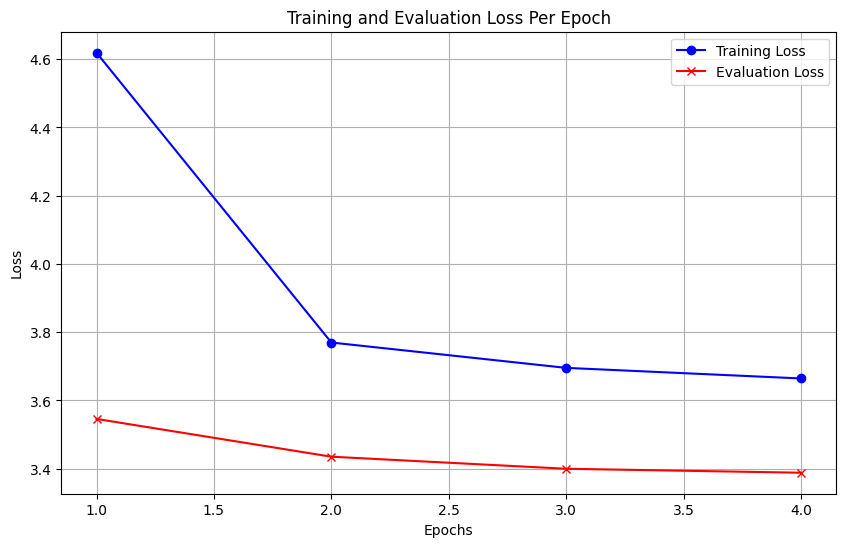

In [ ]:
from transformers import T5ForConditionalGeneration, Seq2SeqTrainer, Seq2SeqTrainingArguments
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load model
model = T5ForConditionalGeneration.from_pretrained("t5-small")

# Configure generation settings
generation_config = model.generation_config
generation_config.min_length = 200
generation_config.max_length = 250
generation_config.num_beams = 4
generation_config.temperature = 3

# Define training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="fine_tuned_t5_small_model-naive-firstapproach",
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    logging_strategy="epoch",     # Log at the end of each epoch
    logging_dir="logs",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=4,
    predict_with_generate=True,
    fp16=True,
    logging_steps=10,  # Log every 10 steps
)

# Initialize trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Access logged history
log_history = trainer.state.log_history

# Extract training and evaluation loss
train_loss = [log['loss'] for log in log_history if 'loss' in log]
eval_loss = [log['eval_loss'] for log in log_history if 'eval_loss' in log]
epochs_train = list(range(1, len(train_loss) + 1))
epochs_eval = list(range(1, len(eval_loss) + 1))

# Plot training and evaluation loss
plt.figure(figsize=(10, 6))

# Plot training loss
if train_loss:
    plt.plot(epochs_train, train_loss, marker='o', label='Training Loss', color='blue')

# Plot evaluation loss
if eval_loss:
    plt.plot(epochs_eval, eval_loss, marker='x', label='Evaluation Loss', color='red')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Evaluation Loss Per Epoch")
plt.legend()
plt.grid()
plt.show()

In [ ]:
trainer.save_model("fine_tuned_t5_small_model-naive-firstapproach")
trainer.push_to_hub("fine_tuned_t5_small_model-naive-firstapproach")

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/ariW/fine_tuned_t5_small_model-naive-firstapproach/commit/2e7cd386e75f8214739746a6cb149f1fab99f7df', commit_message='fine_tuned_t5_small_model-naive-firstapproach', commit_description='', oid='2e7cd386e75f8214739746a6cb149f1fab99f7df', pr_url=None, repo_url=RepoUrl('https://huggingface.co/ariW/fine_tuned_t5_small_model-naive-firstapproach', endpoint='https://huggingface.co', repo_type='model', repo_id='ariW/fine_tuned_t5_small_model-naive-firstapproach'), pr_revision=None, pr_num=None)

## Use the Fine-Tuned Model to make Abstract Text

In [ ]:
test_data = data.iloc[0]
test_data["Merged_Section"]

'the onset of covid-19 in january 2020 heralded an unparalleled global health crisis, leading to widespread fatalities and significant lifestyle changes. the virus’s highly contagious nature, coupled with the emergence of mutated strains, continues to pose concerns about sustained transmission and enduring societal impacts . despite global vaccination efforts, covid-19 remains a substantial challenge. this study identified key determinants of covid-19 vaccination among korean adults using the andersen model. gender, age, education level, job status, marital status, psychological concerns about covid-19, healthcare access, unmet healthcare needs, mental health conditions, and health behaviors all significantly shaped vaccination patterns. the findings suggest that public health authorities should focus on disseminating reliable information about vaccines, especially to economically disadvantaged individuals and those with poor mental or physical health. tailored intervention strategies 

In [ ]:
test_data["Abstract"]

'abstract covid-19 vaccination is a critical public health measure to control the pandemic, but disparities in vaccination uptake remain a concern. this study investigates the determinants of covid-19 vaccination among korean adults using the andersen model. data from 231,784 participants in the community health survey were analyzed using chi-square testing and logistic regression. the risk of non-vaccination was higher among those aged 19–64 , males , the unemployed , unmarried individuals , those with unmet healthcare needs , recipients of national basic livelihood guarantees , those with lower subjective health , individuals with depression , current smokers , and those skipping breakfast . conversely, the risk was lower for those with less than a high school education , individuals with psychological concerns about infection or public criticism , individuals with chronic diseases , and current alcohol consumers . these findings underscore the need for targeted intervention strategi

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="ariW/fine_tuned_t5_small_model-naive-firstapproach")
pred = summarizer(test_data["Merged_Section"], min_length=100)
pred

config.json:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/192 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'summary_text': 'the onset of covid-19 in january 2020 heralded an unparalleled global health crisis . the virus’s highly contagious nature, coupled with the emergence of mutated strains, continues to pose concerns about sustained transmission and enduring societal impacts . gender, age, education level, job status, marital status, unmet healthcare needs, mental health conditions, and health behaviors all significantly shaped vaccination patterns . findings suggest public health authorities should focus on disseminating reliable information about vaccines'}]

# Evaluate the result

In [ ]:
pred[0]['summary_text']

'the onset of covid-19 in january 2020 heralded an unparalleled global health crisis . the virus’s highly contagious nature, coupled with the emergence of mutated strains, continues to pose concerns about sustained transmission and enduring societal impacts . gender, age, education level, job status, marital status, unmet healthcare needs, mental health conditions, and health behaviors all significantly shaped vaccination patterns . findings suggest public health authorities should focus on disseminating reliable information about vaccines'

In [ ]:
preds = [pred[0]['summary_text']]

In [ ]:
labels = [test_data["Abstract"]]

In [ ]:
from evaluate import load

rouge = load("rouge")

rouge.compute(predictions=preds, references=labels, use_stemmer=True)

{'rouge1': 0.2468085106382979,
 'rouge2': 0.05150214592274678,
 'rougeL': 0.15319148936170213,
 'rougeLsum': 0.15319148936170213}

In [ ]:
import bert_score
P, R, F1 = bert_score.score(preds, labels, lang='en', verbose=True)
print(f"Precision: {P}")
print(f"Recall: {R}")
print(f"F1 Score: {F1}")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.12 seconds, 8.14 sentences/sec
Precision: tensor([0.8526])
Recall: tensor([0.8253])
F1 Score: tensor([0.8387])


# Source Copy Rate

In [21]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Abstract', 'Merged_Section'],
        num_rows: 757
    })
    test: Dataset({
        features: ['Abstract', 'Merged_Section'],
        num_rows: 190
    })
})

In [45]:
dataset['test'][0]['Merged_Section']

'psoriasis is a long-term skin disorder that has no cure and may express itself as an active severe disease or as mild stable disease . psoriasis patients are more susceptible to mental health diseases than patients with other dermatological conditions . it is recognized that the risk of depression, anxiety, and suicidality is higher in patients with psoriasis . psoriasis is a specific and important chronic health condition, a long-term skin disorder with no cure, and diagnosed patients are particularly susceptible to experience worse quality of life.using path analysis and hierarchical multiple linear regression, the results indicate that the variables that significantly contribute to psoriasis disability are years of education, impact on social life and body image. body image-related cognitive fusion is a significant mediator in the relationship between disease severity and acceptance, and psoriasis disability.the main findings and strengths of this study are important on three diffe

In [17]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [41]:
from transformers import (
    TFAutoModelForSeq2SeqLM,
    DataCollatorForSeq2Seq,
    create_optimizer,
    AdamWeightDecay,
    TFPegasusForConditionalGeneration,
    PegasusTokenizerFast,
    AutoTokenizer,
    Seq2SeqTrainingArguments,
    Seq2SeqTrainer,
    AutoModelForSeq2SeqLM,
    GenerationConfig,
    T5ForConditionalGeneration,
    pipeline
)
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import numpy as np

In [37]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [20]:
model_name = "ariW/fine_tuned_t5_small_model-naive-firstapproach"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/192 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `3` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `3` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [31]:
# Function for batch prediction
def batch_predict(evaluation_inputs, model, tokenizer, generation_kwargs, batch_size=8):
    inputs = []
    results = []
    for i in tqdm(range(0, len(evaluation_inputs), batch_size), desc="Processing Batches"):
        batch_inputs = evaluation_inputs[i:i + batch_size]
        encodings = tokenizer(
            batch_inputs['Merged_Section'],
            return_tensors="pt",
            padding=True,
            truncation=True
        )


        with torch.no_grad():
            outputs = model.generate(
                encodings["input_ids"].to(device),
                attention_mask=encodings["attention_mask"].to(device),
                **generation_kwargs
            )
        decoded_inputs = tokenizer.batch_decode(encodings['input_ids'], skip_special_tokens=True)
        decoded_outputs = tokenizer.batch_decode(outputs, skip_special_tokens=True, clean_up_tokenization_spaces=True)
        results.extend(decoded_outputs)
        inputs.extend(decoded_inputs)
    return results,inputs

In [38]:
def calculate_copy_rate(inputs, predictions):
    copy_rates = []
    for input_text, prediction in tqdm(zip(inputs, predictions), total=len(inputs), desc="Processing"):
        input_tokens = set(word_tokenize(input_text.lower()))
        pred_tokens = word_tokenize(prediction.lower())
        copied_tokens = [token for token in pred_tokens if token in input_tokens]
        copy_rate = len(copied_tokens) / len(pred_tokens) if pred_tokens else 0
        copy_rates.append(copy_rate)

    return np.mean(copy_rates)

In [35]:
# Perform batch predictions
generation_kwargs = {
    "min_length": 200,
    "max_length": 250,
    "num_beams": 4,    # Use beam search for better quality
    "length_penalty": 1.0
}
generated_summaries = batch_predict(dataset['test'], model, tokenizer, generation_kwargs)
len(generated_summaries)

Processing Batches:   0%|          | 0/24 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `3` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Processing Batches: 100%|██████████| 24/24 [02:32<00:00,  6.34s/it]


2

In [43]:
# Example usage:
average_copy_rate = calculate_copy_rate(generated_summaries[1], generated_summaries[0])
print(f"\nAverage Copy Rate: {average_copy_rate:.2%}")

Processing: 100%|██████████| 190/190 [00:01<00:00, 112.50it/s]


Average Copy Rate: 99.29%
